# Toy distributions

Pints comes with a number of toy [functions](http://pints.readthedocs.io/en/latest/error_measures.html) and [distributions](http://pints.readthedocs.io/en/latest/log_pdfs.html) that can be used in examples or for tests.

## Rosenbrock pdf

This function has a pdf of the form,

$ p(x, y) \propto - \left( (a - x)^2 + b (y - x^2)^2) \right), $

where by default $a = 1$ and $b = 100$.

We now plot this function.

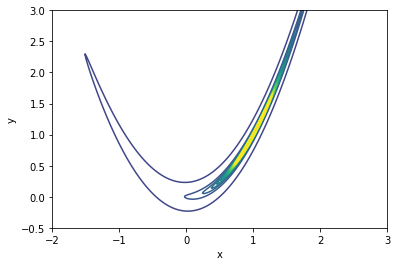

In [2]:
from __future__ import print_function
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create Rosenbrock log pdf
log_pdf = pints.toy.RosenbrockLogPDF()

# Contour plot of pdf
levels = np.linspace(-3, 12, 20)
x = np.linspace(-2, 3, 400)
y = np.linspace(-0.5, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, levels = levels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [3]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([-2, -0.5], [3, 3], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Stop after 8000 iterations
mcmc.set_max_iterations(6000)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[2000:] for chain in chains]

Running...
Done!


We inspect the results by creating a scatter plot of the samples:

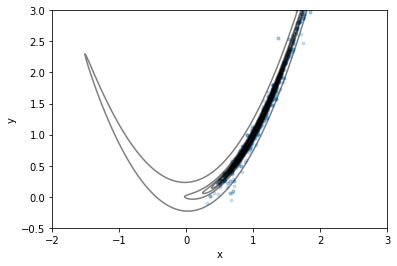

In [4]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-2, 3)
plt.ylim(-0.5, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Twisted Gaussian (banana)

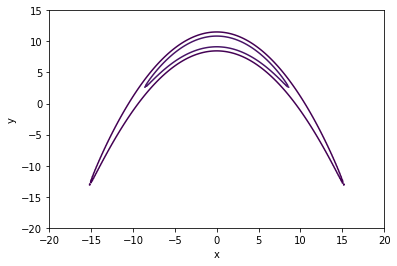

In [5]:
# Create log pdf
log_pdf = pints.toy.TwistedGaussianLogPDF(dimension=2, b=0.1)

# Contour plot of pdf
levels = np.linspace(-3, 12, 20)
x = np.linspace(-20, 20, 250)
y = np.linspace(-20, 15, 250)
X, Y = np.meshgrid(x, y)
Z = [[log_pdf([i, j]) for i in x] for j in y]
plt.contour(X, Y, Z, levels = levels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Try finding with MCMC:

In [6]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([-20, -20], [20, 15], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Stop after 8000 iterations
mcmc.set_max_iterations(6000)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[2000:] for chain in chains]

Running...
Done!


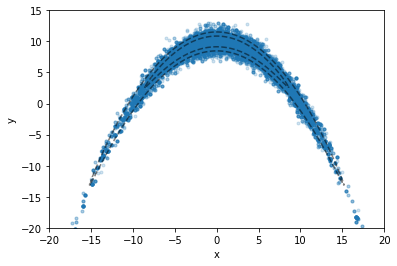

In [7]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-20, 20)
plt.ylim(-20, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Multimodal multivariate Gaussian

We can create a multimodal multivariate gaussian using `MultimodalNormalLogPDF`. By default, this has the distribution

$$ p(\boldsymbol{x}) \propto \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1\right) + \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2\right),$$

where, $\boldsymbol{\mu}_1 = (0,0)$ and $\boldsymbol{\mu}_2 = (10,10)$ and $\boldsymbol{\Sigma}_1$ and $\boldsymbol{\Sigma}_2$ are diagonal correlation matrices.

Plotting this pdf:

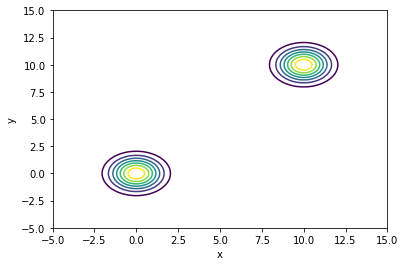

In [8]:
# Create log pdf
log_pdf = pints.toy.MultimodalNormalLogPDF()

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Use adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [9]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


Scatter plot of the samples. Adaptive covariance MCMC does ok if we start the chains between the modes.

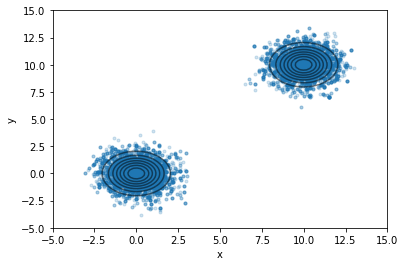

In [10]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

But if we start the chains at one of the modes, it can fail to find the other:

In [13]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([-0.1, -0.1], [0.1, 0.1], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


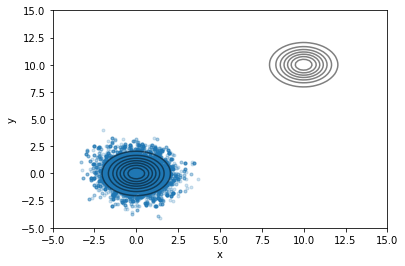

In [17]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors ='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha = 0.2)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()